<a href="https://colab.research.google.com/github/Sushant1805/DL-Assignments/blob/main/DL_Assignment_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementation of logistic regression from scratch and with library


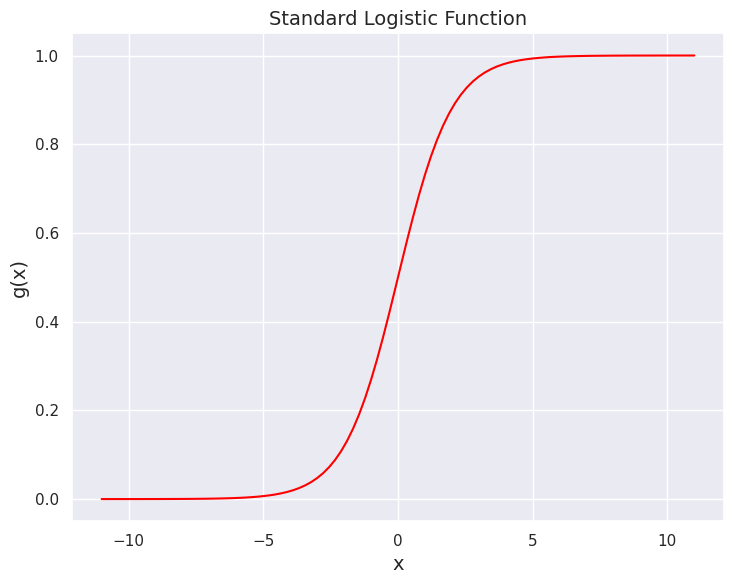

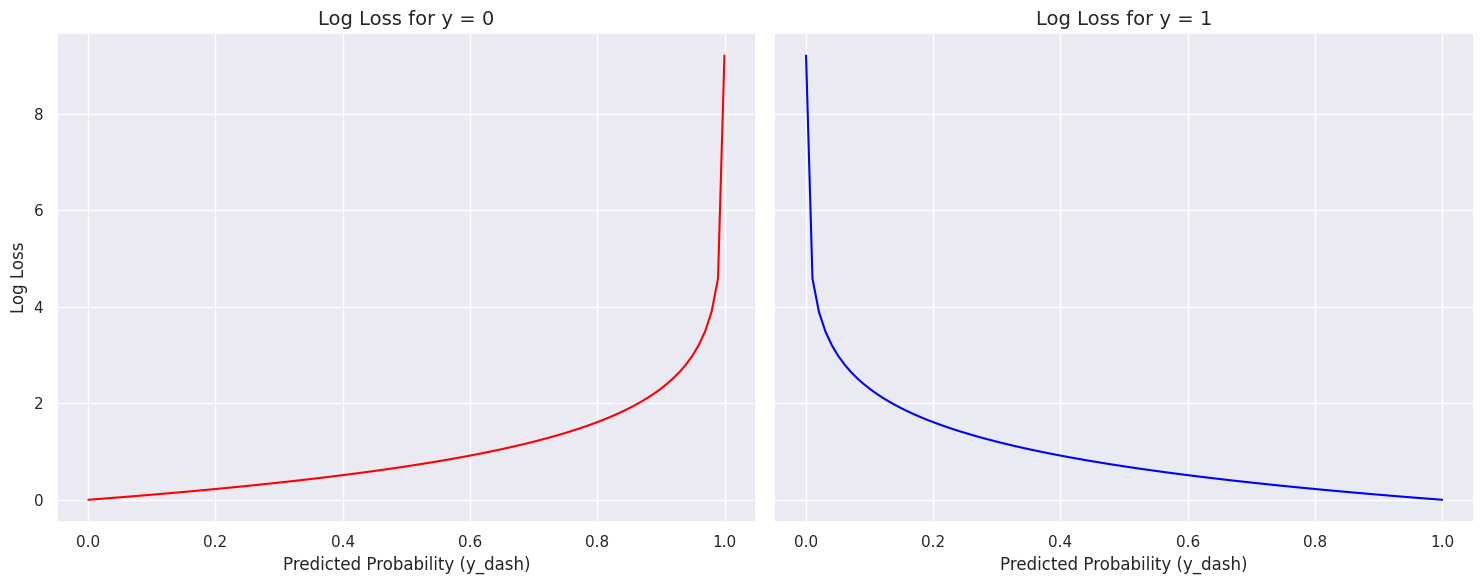


===== Model Evaluation =====
Logistic Regression from Scratch:
Training Accuracy: 0.4813
Testing Accuracy: 0.5500
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        22
           1       0.00      0.00      0.00        18

    accuracy                           0.55        40
   macro avg       0.28      0.50      0.35        40
weighted avg       0.30      0.55      0.39        40


Logistic Regression using scikit-learn:
Training Accuracy: 0.5625
Testing Accuracy: 0.5500
              precision    recall  f1-score   support

           0       0.58      0.68      0.62        22
           1       0.50      0.39      0.44        18

    accuracy                           0.55        40
   macro avg       0.54      0.54      0.53        40
weighted avg       0.54      0.55      0.54        40


===== Performance Metrics =====
Total Runtime: 2.03 seconds
Memory Usage: 271.29 MB


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Importing libraries
import time, psutil, os, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

sns.set_theme()

# Runtime and memory usage
start = time.time()
process = psutil.Process(os.getpid())

# Loading dataset
file_path = 'accident.csv'
df = pd.read_csv(file_path)

# Handling missing values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Speed_of_Impact'] = df['Speed_of_Impact'].fillna(df['Speed_of_Impact'].median())

# Encoding categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male: 1, Female: 0
df['Helmet_Used'] = le.fit_transform(df['Helmet_Used'])  # Yes: 1, No: 0
df['Seatbelt_Used'] = le.fit_transform(df['Seatbelt_Used'])  # Yes: 1, No: 0

# Defining features and target
X = df[['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used']].values
y = df['Survived'].values

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Plotting the logistic function
plt.figure(figsize=(7.5, 6))
x_vals = np.linspace(-11, 11, 100)
plt.plot(x_vals, logistic(x_vals), color='red')
plt.xlabel("x", fontsize=14)
plt.ylabel("g(x)", fontsize=14)
plt.title("Standard Logistic Function", fontsize=14)
plt.tight_layout()
plt.show()

# Log loss
def log_loss(y, y_dash):
    return - (y * np.log(y_dash)) - ((1 - y) * np.log(1 - y_dash))

# Plotting log loss for y = 0 and y = 1
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)
y_dash_vals = np.linspace(0.0001, 0.9999, 100)

ax[0].plot(y_dash_vals, log_loss(0, y_dash_vals), color='red')
ax[0].set_title("Log Loss for y = 0", fontsize=14)
ax[0].set_xlabel("Predicted Probability (y_dash)", fontsize=12)
ax[0].set_ylabel("Log Loss", fontsize=12)

ax[1].plot(y_dash_vals, log_loss(1, y_dash_vals), color='blue')
ax[1].set_title("Log Loss for y = 1", fontsize=14)
ax[1].set_xlabel("Predicted Probability (y_dash)", fontsize=12)

plt.tight_layout()
plt.show()

# Logistic Regression from Scratch (Gradient Descent)
def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0

    for epoch in range(epochs):
        z = np.dot(X, w) + b
        y_pred = logistic(z)

        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        w -= lr * dw
        b -= lr * db

    return w, b

# Training the model from scratch
w_scratch, b_scratch = train_logistic_regression(X_train, y_train)

# Making predictions
y_pred_train_scratch = (logistic(np.dot(X_train, w_scratch) + b_scratch) >= 0.5).astype(int)
y_pred_test_scratch = (logistic(np.dot(X_test, w_scratch) + b_scratch) >= 0.5).astype(int)

# Logistic Regression using scikit-learn
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Making predictions with scikit-learn
y_pred_train_sklearn = log_reg.predict(X_train)
y_pred_test_sklearn = log_reg.predict(X_test)

# Evaluation
print('\n===== Model Evaluation =====')
print('Logistic Regression from Scratch:')
print(f'Training Accuracy: {accuracy_score(y_train, y_pred_train_scratch):.4f}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_test_scratch):.4f}')
print(classification_report(y_test, y_pred_test_scratch))

print('\nLogistic Regression using scikit-learn:')
print(f'Training Accuracy: {accuracy_score(y_train, y_pred_train_sklearn):.4f}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_test_sklearn):.4f}')
print(classification_report(y_test, y_pred_test_sklearn))

# Display runtime and memory usage
end = time.time()
memory_usage = process.memory_info().rss / (1024 ** 2)
print(f'\n===== Performance Metrics =====')
print(f'Total Runtime: {end - start:.2f} seconds')
print(f'Memory Usage: {memory_usage:.2f} MB')


## Ploting RELU and TANEDGE

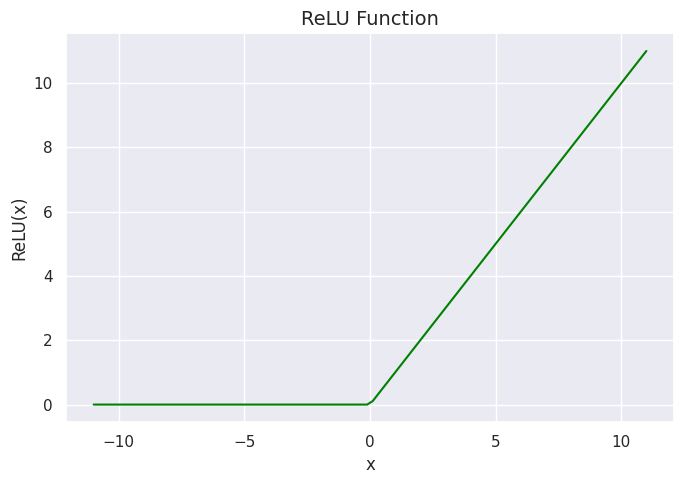

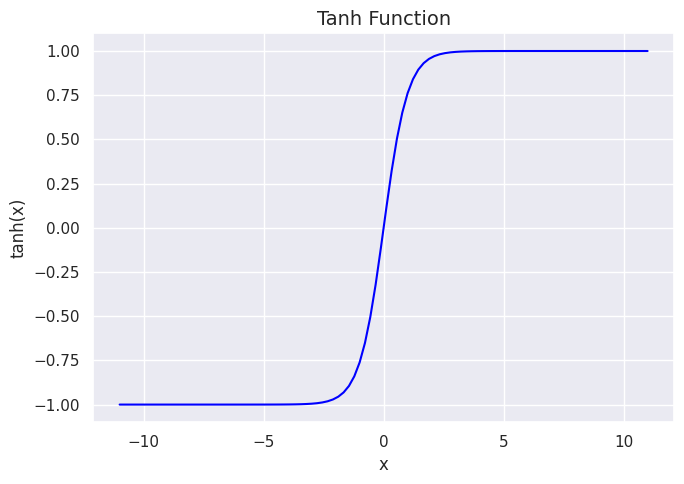

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU function
def relu(x):
    return np.maximum(0, x)

# Tanh function
def tanh(x):
    return np.tanh(x)

# Generating x values
x_vals = np.linspace(-11, 11, 100)

# Plotting ReLU
plt.figure(figsize=(7, 5))
plt.plot(x_vals, relu(x_vals), color='green')
plt.xlabel("x", fontsize=12)
plt.ylabel("ReLU(x)", fontsize=12)
plt.title("ReLU Function", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Tanh
plt.figure(figsize=(7, 5))
plt.plot(x_vals, tanh(x_vals), color='blue')
plt.xlabel("x", fontsize=12)
plt.ylabel("tanh(x)", fontsize=12)
plt.title("Tanh Function", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


## log loss and cross entropy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Load the dataset
file_path = "accident.csv"  # Change the path if needed
df = pd.read_csv(file_path)

# Drop rows with missing values
df_clean = df.dropna().copy()

# Encode categorical variables
df_clean.loc[:, "Helmet_Used"] = df_clean["Helmet_Used"].map({"Yes": 1, "No": 0})
df_clean.loc[:, "Seatbelt_Used"] = df_clean["Seatbelt_Used"].map({"Yes": 1, "No": 0})
df_clean.loc[:, "Gender"] = df_clean["Gender"].map({"Male": 1, "Female": 0})

# Select features and target
X = df_clean[["Age", "Gender", "Speed_of_Impact", "Helmet_Used", "Seatbelt_Used"]]
y = df_clean["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute log loss (cross-entropy)
log_loss_value = log_loss(y_test, y_pred_prob)

print(f"Log Loss (Cross-Entropy): {log_loss_value:.4f}")



Log Loss (Cross-Entropy): 0.7308
